#                                                                   **EXPLORATORY DATA ANALYSIS** 






**Motivation :** 

*   According to the data report from New York Police Department,there are around 1800 criminal reports filed every 28 days.
*   We as students,who return home after evening lectures are at a constant risk of being exploited by any criminal activity.
*  Every part of New York confronts a different high in terms of various criminal activities.So area based analysis to identify risk factors in any particular area has become very important.
*  Often various crimes are targeted towards gender or race of individual,so to mitigate the effects of such type of injustice,we need to identify the areas and the target population ,to help take the right steps in the direction of Social betterment of the society as a whole.






In [0]:
!pip install descartes

In [0]:
!pip install geopandas


    100% |████████████████████████████████| 901kB 22.7MB/s 
    100% |████████████████████████████████| 2.8MB 10.1MB/s 
    100% |████████████████████████████████| 17.9MB 1.7MB/s 
    100% |████████████████████████████████| 1.5MB 14.7MB/s 
  Stored in directory: /root/.cache/pip/wheels/02/cd/b1/a2d6430f74c7a778a43d62f78bec109ca69c732dc9b929142a
  Stored in directory: /root/.cache/pip/wheels/db/bf/bc/06a3e1bfe0ab27d2e720ceb3cff3159398d92644c0cec2c125
Successfully built pyproj munch


In [0]:
import pandas as pd
import urllib
import geopandas as gpd

In [0]:
crime_url = 'https://data.cityofnewyork.us/api/views/5uac-w243/rows.csv?accessType=DOWNLOAD'
urllib.request.urlretrieve(crime_url, "crimes.csv")

('crimes.csv', <http.client.HTTPMessage at 0x7fc06dace668>)

In [0]:
crimes_df = pd.read_csv('crimes.csv')

In [0]:
crimes_df['yearoc'] = crimes_df['CMPLNT_FR_DT'].str[-4:]


In [0]:
crimes_df['yearoc'] = crimes_df['yearoc'].astype(int)

crimes_post2006 = crimes_df[crimes_df['yearoc'] >= 2006]

In [0]:
crimes_post2006['crime_date'] = pd.to_datetime(crimes_post2006['CMPLNT_FR_DT'] + ' ' + crimes_post2006['CMPLNT_FR_TM'], infer_datetime_format=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
#group number of crimes by offense type at precinct level at date and hour:
crimes_post2006['hour'] = crimes_post2006['crime_date'].dt.hour
crimes_post2006['date_crime'] = crimes_post2006['crime_date'].dt.date


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
crimes_post2006.columns

Index(['CMPLNT_NUM', 'ADDR_PCT_CD', 'BORO_NM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM',
       'CMPLNT_TO_DT', 'CMPLNT_TO_TM', 'CRM_ATPT_CPTD_CD', 'HADEVELOPT',
       'HOUSING_PSA', 'JURISDICTION_CODE', 'JURIS_DESC', 'KY_CD', 'LAW_CAT_CD',
       'LOC_OF_OCCUR_DESC', 'OFNS_DESC', 'PARKS_NM', 'PATROL_BORO', 'PD_CD',
       'PD_DESC', 'PREM_TYP_DESC', 'RPT_DT', 'STATION_NAME', 'SUSP_AGE_GROUP',
       'SUSP_RACE', 'SUSP_SEX', 'TRANSIT_DISTRICT', 'VIC_AGE_GROUP',
       'VIC_RACE', 'VIC_SEX', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude',
       'Longitude', 'Lat_Lon', 'yearoc', 'crime_date', 'hour', 'date_crime'],
      dtype='object')

In [0]:
crimes_post2006_borough = crimes_post2006.groupby(by=['BORO_NM'])[['CMPLNT_NUM','BORO_NM']].count()
crimes_post2006_borough_norm = crimes_post2006_borough[['BORO_NM']] / crimes_post2006_borough['BORO_NM'].sum()

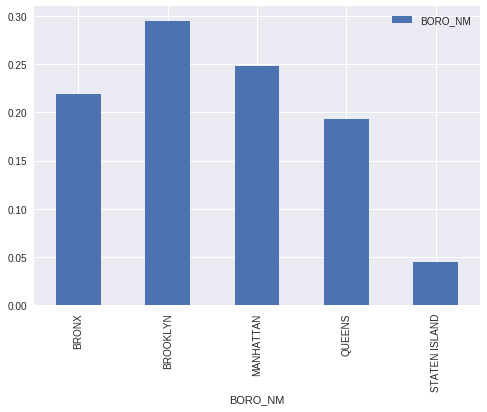

In [0]:
crimes_post2006_borough_norm.plot(kind='bar')

**A normalized analysis of crime reports in each of the five boroughs of New York over the entire period of available data.**
*Brooklyn reported highest number of complains whereas Staten Island had the lowest complains reported.*

In [0]:
# compare by race inside various boroughs:
sum_inc1 = crimes_post2006[crimes_post2006['VIC_RACE'] != 'UNKNOWN'].groupby(by=['BORO_NM','VIC_RACE'])[['CMPLNT_NUM','BORO_NM', 'VIC_RACE']].count()
sum_inc1.drop( ['VIC_RACE','BORO_NM'], axis=1,inplace=True)
sum_inc1.reset_index(inplace=True)


In [0]:
amer_ind = sum_inc1[sum_inc1['VIC_RACE'] == 'AMER IND']['CMPLNT_NUM'].values
ap= sum_inc1[sum_inc1['VIC_RACE'] == 'ASIAN/PAC.ISL']['CMPLNT_NUM'].values
w = sum_inc1[sum_inc1['VIC_RACE'] == 'WHITE']['CMPLNT_NUM'].values
b = sum_inc1[sum_inc1['VIC_RACE'] == 'BLACK']['CMPLNT_NUM'].values
bh = sum_inc1[sum_inc1['VIC_RACE'] == 'BLACK HISPANIC']['CMPLNT_NUM'].values
wh = sum_inc1[sum_inc1['VIC_RACE'] == 'WHITE HISPANIC']['CMPLNT_NUM'].values


boroughs = sum_inc1.BORO_NM.unique().tolist()

In [0]:
gdf1 = pd.DataFrame({'AMER IND':amer_ind ,'ASIAN/PAC.ISL':ap, 'WHITE': w,'BLACK': b, 'BLACK HISPANIC' : bh, 'WHITE HISPANIC': wh},\
                  index=boroughs)

In [0]:
gdf1

,AMER IND,ASIAN/PAC.ISL,BLACK,BLACK HISPANIC,WHITE,WHITE HISPANIC
BRONX,187,1068,13540,4302,2746,13514
BROOKLYN,334,3840,22561,1379,11248,7943
MANHATTAN,254,3263,9533,1910,11333,7399
QUEENS,338,7062,9183,783,6820,8882
STATEN ISLAND,62,324,1915,156,3617,1385


In [0]:
gdf1['sum'] = gdf1.iloc[0:7].sum(axis=1)
df_new1 = gdf1.loc[:,"AMER IND":"WHITE HISPANIC"].div(gdf1["sum"], axis=0)


In [0]:
df_new1 

,AMER IND,ASIAN/PAC.ISL,BLACK,BLACK HISPANIC,WHITE,WHITE HISPANIC
BRONX,0.005289,0.030206,0.382951,0.121673,0.077665,0.382216
BROOKLYN,0.007061,0.081175,0.476926,0.029151,0.237776,0.167910
MANHATTAN,0.007539,0.096848,0.282946,0.056690,0.336371,0.219607
QUEENS,0.010221,0.213560,0.277700,0.023678,0.206242,0.268598
STATEN ISLAND,0.008312,0.043437,0.256737,0.020914,0.484918,0.185682


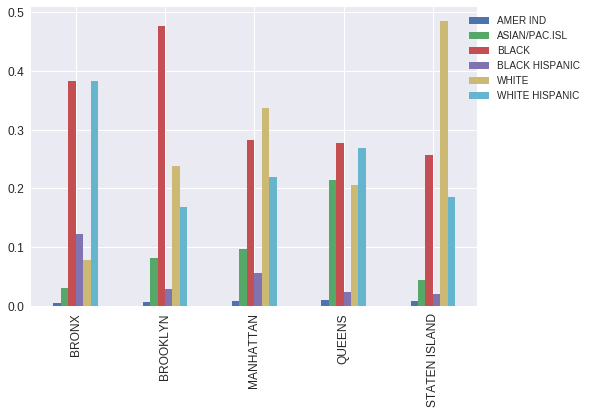

In [0]:
df_new1.plot(kind="bar",fontsize=12.0).legend(bbox_to_anchor=(1.25, 1.0))

**2 level study of each of the boroughs and various races in the respective boroughs which were victimized in criminal activities.**(American indians are least victimized whereas several different variations occur in other races based on the boroughs.)


In [0]:
sum_inc2 = crimes_post2006[(crimes_post2006['VIC_SEX'] != 'U') & (crimes_post2006['VIC_SEX' ] != 'D') & (crimes_post2006['VIC_SEX' ] != 'E')].groupby(by=['BORO_NM','VIC_SEX'])[['CMPLNT_NUM','BORO_NM', 'VIC_SEX']].count()
sum_inc2.drop( ['VIC_SEX','BORO_NM'], axis=1,inplace=True)
sum_inc2.reset_index(inplace=True)


In [0]:
sum_inc2

,BORO_NM,VIC_SEX,CMPLNT_NUM
0,BRONX,F,21599
1,BRONX,M,16277
2,BROOKLYN,F,26895
3,BROOKLYN,M,23236
4,MANHATTAN,F,19284
5,MANHATTAN,M,16964
6,QUEENS,F,18021
7,QUEENS,M,16621
8,STATEN ISLAND,F,4560
9,STATEN ISLAND,M,3330


In [0]:
m = sum_inc2[sum_inc2['VIC_SEX'] == 'M']['CMPLNT_NUM'].values
f= sum_inc2[sum_inc2['VIC_SEX'] == 'F']['CMPLNT_NUM'].values

In [0]:
gdf2 = pd.DataFrame({'MALE VICTIMS':m ,'FEMALE VICTIMS':f},\
                  index=boroughs)

In [0]:
gdf2['sum'] = gdf2.iloc[0:6].sum(axis=1)
df_new2= gdf2.loc[:,"FEMALE VICTIMS":"MALE VICTIMS"].div(gdf2["sum"], axis=0)


In [0]:
df_new2

,FEMALE VICTIMS,MALE VICTIMS
BRONX,0.570256,0.429744
BROOKLYN,0.536494,0.463506
MANHATTAN,0.532002,0.467998
QUEENS,0.520207,0.479793
STATEN ISLAND,0.577947,0.422053


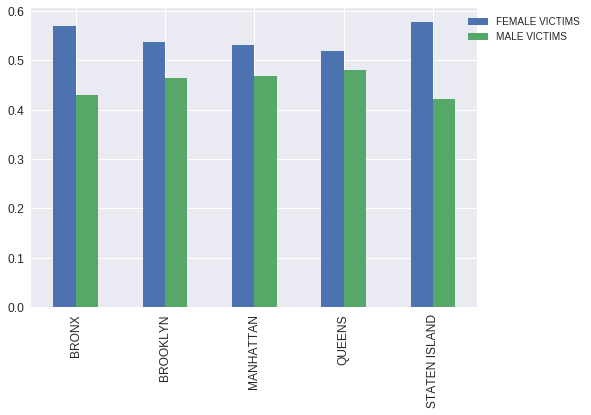

In [0]:
df_new2.plot(kind="bar",fontsize=12.0).legend(bbox_to_anchor=(1.25, 1.0))

 **Another detailed analysis indicative of male and female population, from each of the five boroughs ,who were victimized.**(Although females everywhere have a high rate of victimization ,Male population is also nearly equally affected by it in some regions.)

In [0]:
# compare by race inside various boroughs:
sum_inc13 = crimes_post2006[crimes_post2006['SUSP_RACE'] != 'UNKNOWN'].groupby(by=['BORO_NM','SUSP_RACE'])[['CMPLNT_NUM','BORO_NM', 'SUSP_RACE']].count()
sum_inc13.drop( ['SUSP_RACE','BORO_NM'], axis=1,inplace=True)
sum_inc13.reset_index(inplace=True)

amer_ind = sum_inc13[sum_inc13['SUSP_RACE'] == 'AMER IND']['CMPLNT_NUM'].values
ap= sum_inc13[sum_inc13['SUSP_RACE'] == 'ASIAN/PAC.ISL']['CMPLNT_NUM'].values
w = sum_inc13[sum_inc13['SUSP_RACE'] == 'WHITE']['CMPLNT_NUM'].values
b = sum_inc13[sum_inc13['SUSP_RACE'] == 'BLACK']['CMPLNT_NUM'].values
bh = sum_inc13[sum_inc13['SUSP_RACE'] == 'BLACK HISPANIC']['CMPLNT_NUM'].values
wh = sum_inc13[sum_inc13['SUSP_RACE'] == 'WHITE HISPANIC']['CMPLNT_NUM'].values




In [0]:
gdf3 = pd.DataFrame({'AMER IND':amer_ind ,'ASIAN/PAC.ISL':ap, 'WHITE': w,'BLACK': b, 'BLACK HISPANIC' : bh, 'WHITE HISPANIC': wh},\
                  index=boroughs)

In [0]:
gdf3['sum'] = gdf3.iloc[0:7].sum(axis=1)
df_new3 = gdf3.loc[:,"AMER IND":"WHITE HISPANIC"].div(gdf3["sum"], axis=0)

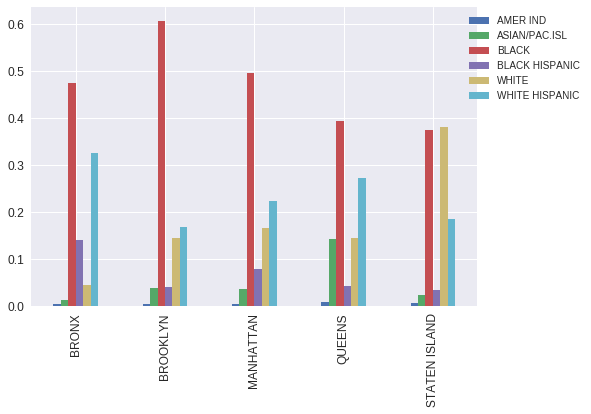

In [0]:
df_new3.plot(kind="bar",fontsize=12.0).legend(bbox_to_anchor=(1.25, 1.0))

**Comapritive analysis to find the race of suspects of criminal activities from each of the borough.**(Black population constitute the major portion of suspects of criminal activities in all New York.)


In [0]:
sum_inc3 = crimes_post2006[(crimes_post2006['SUSP_SEX'] != 'U') & (crimes_post2006['SUSP_SEX' ] != 'D') & (crimes_post2006['SUSP_SEX' ] != 'E')].groupby(by=['BORO_NM','SUSP_SEX'])[['CMPLNT_NUM','BORO_NM', 'SUSP_SEX']].count()
sum_inc3.drop( ['SUSP_SEX','BORO_NM'], axis=1,inplace=True)
sum_inc3.reset_index(inplace=True)

In [0]:
m1 = sum_inc3[sum_inc3['SUSP_SEX'] == 'M']['CMPLNT_NUM'].values
f1= sum_inc3[sum_inc3['SUSP_SEX'] == 'F']['CMPLNT_NUM'].values

In [0]:
gdf4 = pd.DataFrame({'MALE SUSPECTS':m1 ,'FEMALE SUSPECTS':f1},\
                  index=boroughs)

In [0]:
gdf4['sum'] = gdf4.iloc[0:6].sum(axis=1)
df_new4= gdf4.loc[:,"FEMALE SUSPECTS":"MALE SUSPECTS"].div(gdf4["sum"], axis=0)

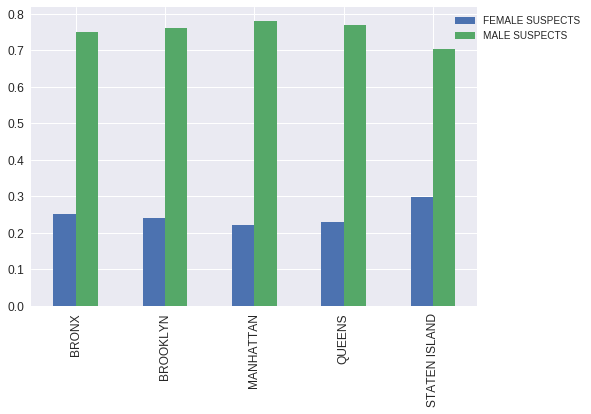

In [0]:
df_new4.plot(kind="bar",fontsize=12.0).legend(bbox_to_anchor=(1.25, 1.0))

**Gender based analysis indicative of male and female population, from each of the five boroughs ,who were suspected of criminal activities.**(We notice a major difference in number of female criminal suspects as comapred to males.)

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Male/Female comaprison across across all police precincts')

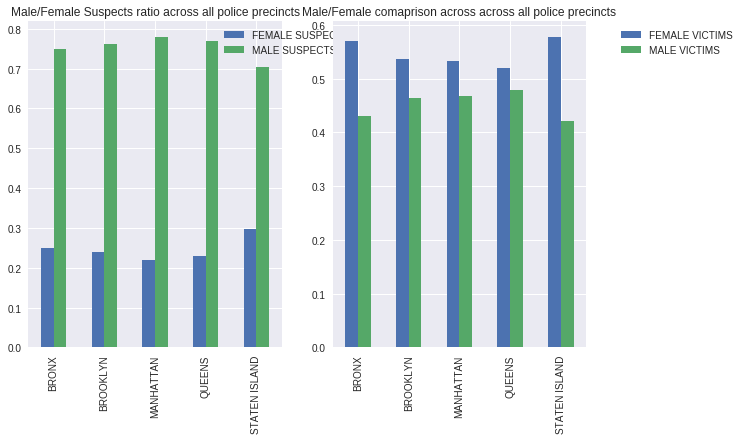

In [0]:
fig = pl.figure(figsize=(10,6))

ax1 = fig.add_subplot(121)
df_new4.plot(ax=ax1,kind="bar",fontsize=10.0).legend(bbox_to_anchor=(1.30,1.0))
#pl.legend(fontsize=12.0)
pl.title('Male/Female Suspects ratio across all police precincts')


ax2 = fig.add_subplot(122)
pl.legend(fontsize=12.0)
df_new2.plot(ax=ax2,kind="bar",fontsize=10.0).legend(bbox_to_anchor=(1.10, 1.0))
pl.title('Male/Female comaprison across across all police precincts')


**Simultaneous comparison of Male and Female count of suspects*(left)* and victims*(right)* in criminal activities** .Although victimization is not gender biased ,there is a noticeable difference when we look at huge number of male suspect reports as comapred to women suspect reports).

In [0]:
nypd_juris_shp = 'https://data.cityofnewyork.us/api/geospatial/78dh-3ptz?method=export&format=Shapefile'
urllib.request.urlretrieve(nypd_juris_shp, "nypd_juris_shp.zip")
!unzip nypd_juris_shp.zip

Archive:  nypd_juris_shp.zip
  inflating: geo_export_8dd46d76-c624-46fe-9123-529d98dcee03.dbf  
  inflating: geo_export_8dd46d76-c624-46fe-9123-529d98dcee03.shp  
  inflating: geo_export_8dd46d76-c624-46fe-9123-529d98dcee03.shx  
  inflating: geo_export_8dd46d76-c624-46fe-9123-529d98dcee03.prj  


In [0]:
pp_shp = gpd.GeoDataFrame.from_file('./geo_export_8dd46d76-c624-46fe-9123-529d98dcee03.shp')

In [0]:
pp_shp.set_index('precinct',inplace=True)

In [0]:
crimes_post2006_pp = crimes_post2006.groupby(by=['ADDR_PCT_CD'])[['CMPLNT_NUM','ADDR_PCT_CD']].count()
crimes_post2006_pp_norm = crimes_post2006_pp[['ADDR_PCT_CD']] / crimes_post2006_pp['ADDR_PCT_CD'].sum()

In [0]:
pp_shp_m = pp_shp.merge(crimes_post2006_pp_norm,left_index=True, right_index=True)

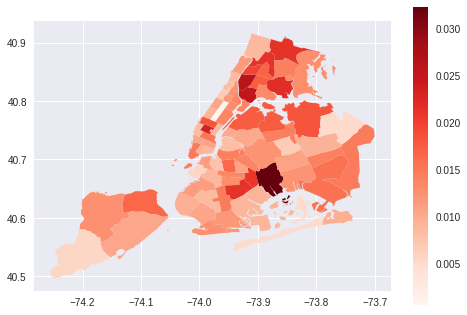

In [0]:
pp_shp_m.plot(column='ADDR_PCT_CD', cmap='Reds',legend=True)


***"Intensity of crime reporting"*** **analysis of all the police precincts**(Part of Brooklyn(brown) has reported the most criminal incidents from 2006 to 2018).

In [0]:
# top 5 occuring crimes across each precinct and their corresponding heatmaps

crimes_post2006_ot = crimes_post2006.groupby(by=['OFNS_DESC'])[['CMPLNT_NUM','OFNS_DESC']].count()
crimes_post2006_ot.drop( ['OFNS_DESC'], axis=1,inplace=True)
top_oc = crimes_post2006_ot.reset_index().sort_values(by=['CMPLNT_NUM'],ascending=False).iloc[0:5]


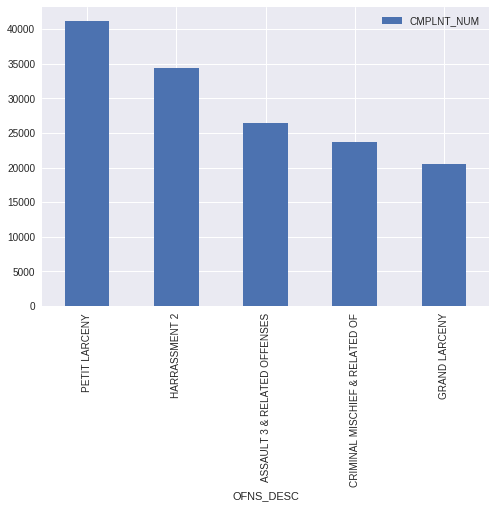

In [0]:
top_oc.set_index('OFNS_DESC',inplace=True)
top_oc.plot(kind='bar')

### **Analysis result of top 5 types of offences reported in New York(overall).**(We notice that both larcenies(Grand and Petit ) are amongst the major criminal incidents of New York)

In [0]:
top_oc

,CMPLNT_NUM
OFNS_DESC,
PETIT LARCENY,41146
HARRASSMENT 2,34416
ASSAULT 3 & RELATED OFFENSES,26448
CRIMINAL MISCHIEF & RELATED OF,23739
GRAND LARCENY,20478


In [0]:
crimes_post2006_pp_pl = crimes_post2006[crimes_post2006['OFNS_DESC'] == 'PETIT LARCENY'].groupby(by=['ADDR_PCT_CD'])[['CMPLNT_NUM','ADDR_PCT_CD']].count()
crimes_post2006_pp_norm_pl = crimes_post2006_pp_pl[['ADDR_PCT_CD']] / crimes_post2006_pp_pl['ADDR_PCT_CD'].sum()


In [0]:
crimes_post2006_pp_norm_pl.head()

,ADDR_PCT_CD
ADDR_PCT_CD,
1,0.029286
5,0.010159
6,0.013829
7,0.006951
9,0.014242


In [0]:

pp_shp_m1 = pp_shp.merge(crimes_post2006_pp_norm_pl,left_index=True, right_index=True)

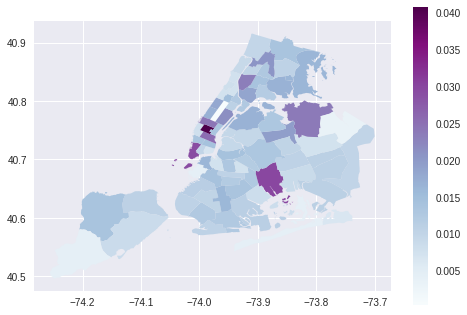

In [0]:
pp_shp_m1.plot(column='ADDR_PCT_CD', cmap='BuPu',legend=True)


**Police Precenct level analysis of "PETIT LARCENY"(Highest Reported Crime)** 


In [0]:
crimes_post2006_pp_hl = crimes_post2006[crimes_post2006['OFNS_DESC'] == 'HARRASSMENT 2'].groupby(by=['ADDR_PCT_CD'])[['CMPLNT_NUM','ADDR_PCT_CD']].count()
crimes_post2006_pp_norm_hl = crimes_post2006_pp_hl[['ADDR_PCT_CD']] / crimes_post2006_pp_hl['ADDR_PCT_CD'].sum()


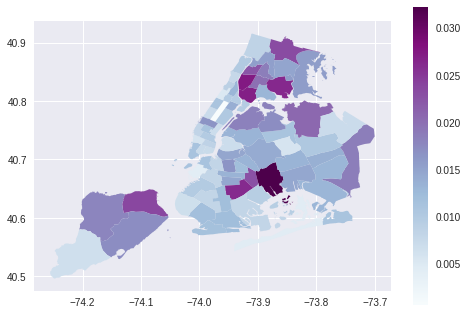

In [0]:
pp_shp_m2 = pp_shp.merge(crimes_post2006_pp_norm_hl,left_index=True, right_index=True)
pp_shp_m2.plot(column='ADDR_PCT_CD', cmap='BuPu',legend=True)


**Police Precenct level analysis of "HARRASSMENT"(2nd Highest Reported Crime)** 

In [0]:
crimes_post2006_pp_as = crimes_post2006[crimes_post2006['OFNS_DESC'] == 'ASSAULT 3 & RELATED OFFENSES'].groupby(by=['ADDR_PCT_CD'])[['CMPLNT_NUM','ADDR_PCT_CD']].count()
crimes_post2006_pp_norm_as = crimes_post2006_pp_as[['ADDR_PCT_CD']] / crimes_post2006_pp_as['ADDR_PCT_CD'].sum()


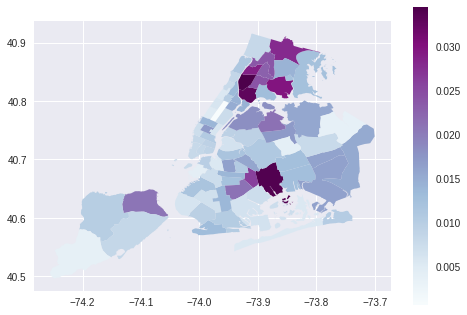

In [0]:
pp_shp_m3 = pp_shp.merge(crimes_post2006_pp_norm_as,left_index=True, right_index=True)
pp_shp_m3.plot(column='ADDR_PCT_CD', cmap='BuPu',legend=True)


**Police Precenct level analysis of "ASSAULT 3 & RELATED OFFENSES"(3rd Highest Reported crime)**

In [0]:
crimes_post2006_pp_cm = crimes_post2006[crimes_post2006['OFNS_DESC'] == 'CRIMINAL MISCHIEF & RELATED OF'].groupby(by=['ADDR_PCT_CD'])[['CMPLNT_NUM','ADDR_PCT_CD']].count()
crimes_post2006_pp_norm_cm = crimes_post2006_pp_cm[['ADDR_PCT_CD']] / crimes_post2006_pp_cm['ADDR_PCT_CD'].sum()


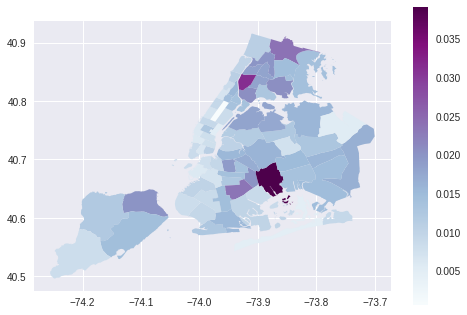

In [0]:
pp_shp_m4 = pp_shp.merge(crimes_post2006_pp_norm_cm,left_index=True, right_index=True)
pp_shp_m4.plot(column='ADDR_PCT_CD', cmap='BuPu',legend=True)


**Police Precenct level analysis of "CRIMINAL MISCHIEF AND RELATED OFFENCE"(4th Highest Reported crime)**

In [0]:
crimes_post2006_pp_gl = crimes_post2006[crimes_post2006['OFNS_DESC'] == 'GRAND LARCENY'].groupby(by=['ADDR_PCT_CD'])[['CMPLNT_NUM','ADDR_PCT_CD']].count()
crimes_post2006_pp_norm_gl= crimes_post2006_pp_gl[['ADDR_PCT_CD']] / crimes_post2006_pp_gl['ADDR_PCT_CD'].sum()


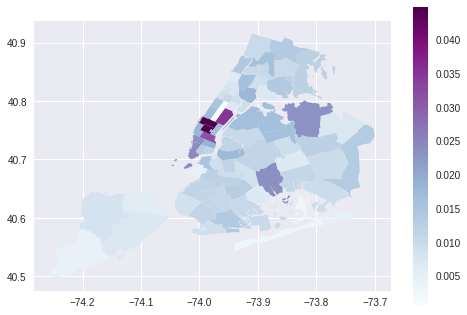

In [0]:
pp_shp_m5 = pp_shp.merge(crimes_post2006_pp_norm_gl,left_index=True, right_index=True)
pp_shp_m5.plot(column='ADDR_PCT_CD', cmap='BuPu',legend=True)


**Police Precenct level analysis of "GRAND LARCENY"(5th Highest Reported crime)**

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


(-74.28337047811607, -73.67222994890953, 40.47514452612939, 40.93650364504154)

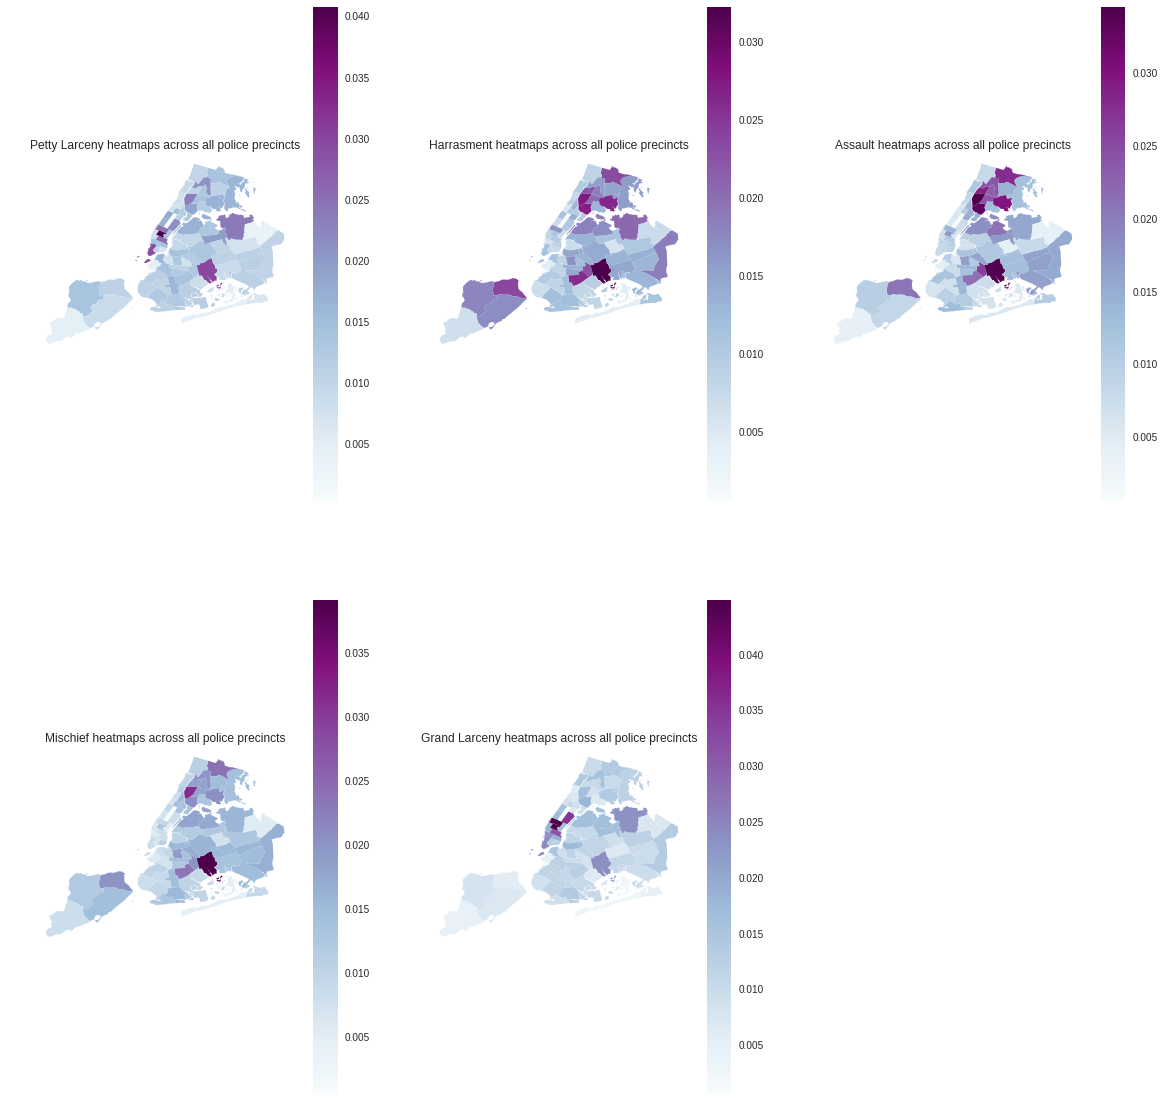

In [0]:
import pylab as pl
fig = pl.figure(figsize=(20,20))

ax1 = fig.add_subplot(231)
pp_shp_m1.plot(ax=ax1, column='ADDR_PCT_CD', cmap='BuPu',legend=True)

pl.title('Petty Larceny heatmaps across all police precincts')
pl.axis('off')

ax2 = fig.add_subplot(232)
pl.legend(fontsize=12.0)
pp_shp_m2.plot(ax=ax2,column='ADDR_PCT_CD', cmap='BuPu',legend=True)

pl.title('Harrasment heatmaps across all police precincts')
pl.axis('off')


ax3 = fig.add_subplot(233)
pl.legend(fontsize=12.0)
pp_shp_m3.plot(ax=ax3,column='ADDR_PCT_CD', cmap='BuPu',legend=True)

pl.title('Assault heatmaps across all police precincts')
pl.axis('off')


ax4 = fig.add_subplot(234)
pl.legend(fontsize=12.0)
pp_shp_m4.plot(ax=ax4,column='ADDR_PCT_CD', cmap='BuPu',legend=True)

pl.title('Mischief heatmaps across all police precincts')
pl.axis('off')


ax5= fig.add_subplot(235)
pl.legend(fontsize=12.0)
pp_shp_m5.plot(ax=ax5,column='ADDR_PCT_CD', cmap='BuPu',legend=True)

pl.title('Grand Larceny heatmaps across all police precincts')
pl.axis('off')

